Image Processing Assignment 1<br>
Damian Wojtowicz<br>
C17413722<br>

### Description
The goal of this project is to restore damaged images. There are two sample images that need to be restored;<br>
Faded.jpg and Damaged.jpg, and the algorithm should work for any images of the same type.<br>
<br>
I have developed two algorithms for restoring each image type because I was simply unable to find<br>
enough similary between the two images. Both are very different in my<br>
personal opinion. Below I outline the differences:<br>
<br>
**Image 1 (Faded Image):**<br>
1\. Has straight defined edges<br>
2\. The method of restoration involves reducing the intensity by a fixed value<br>
<br>
**Image 2 (Yellow Damage Image):**<br>
1\. Has no well defined edges.<br>
2\. The damage is not equal across the damaged region of interest.<br>
   Some parts of the image are more damaged than others.<br>
   The first image deals with brightness/intensity. The second image<br>
   involves restoring the ratio of RGB and denoising.<br>
<br>
The process of segmenting the damage and restoring the two images is different and it is treated as such. <br>
This program has the capability to distinguish between the two different types of images automatically and so all the <br>
user has to do is provide the image.<br>
<br>
After the program is finished the image is displayed on screen and also written to a file (restoredImage.jpg)<br>
Matplot lib is used to display the "progress" images of the algorithm which can be viewed at the end.<br>

### Method For Restoring Image 1 (Faded Image)
1\. A grayscale image of the original is created. This will be useful in the algorithm in many ways.<br>
2\. Canny edge detection [2] is used to get the contours of the image<br>
3\. Contours are redrawn ticker with the drawContours() method so that it is easier to extract horizontal and vertical lines<br>
4\. Horizontal and Vertical lines are extracted using morphological transformations<br>
5\. Intersection points of the horizontal and vertical lines are obtained using the bitwise_and() method.<br>
   These intersection points define where the faded region is.<br>
6\. These intersection points are filtered to obtain two points that can be used to form a rectangle that defines the faded region.<br>
   These two points are used for cropping the image<br>
7\. The faded region is cropped<br>
8\. The minimum intensity value of the faded region and the original image is obtained. The difference between these two values<br>
   is the "shift" value. This value will be subtracted from the faded region to restore it.<br>
9\. The cropped restored region is put back on top of the original<br>
10\. The border between the previously faded region and the undamaged region that remained even after the restoration is<br>
    hidden using the inpaint() method from the opencv library.<br>
11\. The restored image is displayed to the user on screen.<br>
12\. The restored image is written to a file.

### Method For Restoring Image 2 (Damaged Image)
1\. The image is converted to the RGB colour space<br>
2\. The mean values for red, green, and blue in the image are obtained<br>
3\. The highest and lowest of the three values are picked out<br>
4\. Another image is created, it is the original image converted to the HSV colour space<br>
5\. The damaged pixels have their saturation reduced to 0, this is done by iterating over the pixels and <br>
    if the ratio of the lowest mean colour to the highest mean colour is past a certain value then we know there <br>
    is colour damage and that pixel's saturation is turned into 0.<br>
6\. The image with reduced saturation no longer has the dark patches that the original grayscale image had.<br>
    The reduced saturation image is then passed to a denoise function from opencv where the damage is denoised/blended<br>
7\. The restored image is displayed to the user on screen.<br>
8\. The restored image is written to a file.


### Alternative methods researched
I have researched the use of Hough Line Transform in order to extend out the lines in an attempt to better identify<br>
the border between the faded region and the undamaged region to extract the faded region. This has not turned out well <br>
because too many intersections between the lines were created in some instances and that affected the algorithm in a negative way.<br>
<br>
I have also researched changing the contract and brightness of the entire image in an attempt to better define the damage.<br>
After several rounds of experimentation I have found that altering the image before Canny Edge Detection [2] had the opposite effect<br>
or no positive effect at least. Increasing the brightness has blended the faded region<br>
to the white undamage pixels and increasing the contrast can blend the faded region to the black undamaged black pixels.<br>
As a result the countours became less defined and less accurate.<br>
<br>
I have also experimented with kernels that blur, sharpen, define vertical edges and horizontal edges. None of these have yeileded<br>
the desired results and only further decreased the accuracy of the algorithm.<br>
<br>
I have experimented with colour spaces such as RGB, HSV, LAB, XYZ and YUV. As well as their combinations. I have found that different colour spaces<br>
do not help better identify the damage in the Faded.jpg image. However, converting to RGB has been helpful in identifying the damage in Damaged.jpg image.<br>
<br>
I have experimented with histogram equalization of colored images in an attempt to restore Damaged.jpg.<br>
https://towardsdatascience.com/histogram-equalization-a-simple-way-to-improve-the-contrast-of-your-image-bcd66596d815
This has not helped as much as I had hoped because the damage is stronger in some regions than it is in others.<br>
<br>
I have also researched thresholding in an attempt to isolate the damage in the Faded.jpg image and this has not helped. This is mainly due to<br>
the fact that a simple threshold will not identify the damage. Adaptive thresholding has not been much more successful over my current method.

### Testing
The code has been tested with 4 other images (Faded2.jpg, Faded3.jpg, Faded4.jpg, Faded5.jpg) that are of similar nature to Faded.jpg<br>
All three images have been restored successfully.<br>

The code has also been tested on 2 other images (Damaged2.jpg, Damaged3.jpg) that are of similar nature to Damaged.jpg<br>
It is actually the same image where the colour of the damage is a different hue and the algorithm was performed performed well and the<br>
program was still able to distingish between the Damaged and Faded images.<br>
I have not been able to find similar images to Damaged.jpg where there has been colour damage so I simply recoloured Damaged.jpg.<br>

### Conclusion
The restoration for the faded images works very well in terms of both performance and speed.<br>
The restoration of the yellow damaged image, or any colour for that matter has also been successful in terms of both performance and speed.<br>
There is a slight "glow" as a result of the denoising in the Damaged.jpg image, however it can still be considered<br>
a very successful restoration.<br>

### References
1\. OpenCV: Image Inpainting [Internet]. Opencv.org.<br>&nbsp;&nbsp;&nbsp; 
    2021 [cited 2021 Jan 15].<br>&nbsp;&nbsp;&nbsp; 
    Available from: https://docs.opencv.org/3.4/df/d3d/tutorial_py_inpainting.html<br>&nbsp;&nbsp;&nbsp; 
    <br>
2\. Canny Edge Detection — OpenCV-Python Tutorials 1 documentation [Internet]. Readthedocs.io. 2013 [cited 2020 Nov 22].<br>&nbsp;&nbsp;&nbsp; 
    Available from: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html<br>
    <br>
3\. OpenCV: Morphological Transformations [Internet]. Opencv.org. 2020 [cited 2020 Nov 22].<br>&nbsp;&nbsp;&nbsp; 
    Available from: https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html<br>
    <br>

In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui

In [2]:
easygui.msgbox("Plese select your image you want to restore")
imageFile = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
image = cv2.imread(imageFile)

In [3]:
# imageName = "Faded.jpg"
# image = cv2.imread(imageName)

In [4]:
# Load in the image
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Get dimensions
h, w = imageGray.shape

#### Obtaining and Redefining Edges
The edges in the image are obtained and redrawn thicker so that extracting<br>
verical and horizontal lines is easier. These lines will be used to define the faded region<br>

In [5]:
def obtainAndRedefineEdges(image):
    # Image is converted to grayscale because this helps define the edges better
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Get edges of the faded region
    edged = cv2.Canny(image, 70, 200)
    
    # Get contours of the edges
    # cv2.RETR_EXTERNAL retrieves only the extreme outer contours.
    # cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points.
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Image that the contours will be drawn on (black image initially)
    imageForContours = np.zeros((h, w), np.uint8)

    # Draw contours, it redraws the edges but thicker so that stright lines become easier to identify
    # Contour size needs to be adjusted to the image size
    contourSize = 2
    if h > 1000 or w > 1000:
        contourSize = 3
    if h > 2000 or w > 2000:
        contourSize = 4
        
    cv2.drawContours(imageForContours, contours, -1, (255,255,255), contourSize);
    
    return edged, imageForContours

#### Obtaining Horizontal and Vertical Edges
The horizontal and vertical edges that make up the faded region box are obtained.<br>
These lines will later be used to extract the two points needed extract the faded region (top-left, bottom-right)<br>
<br>
The horizontal_size and vertical_size is set to 70, this is the minimum line length for extraction.<br>
This value was deduced after a lot of testing on existing images.<br>
Obtaining the value automatically is not easy because every image is different in terms<br>
of how many objects are in the image which introduce more lines.<br>
If the value is too high then not enough lines might be detected.<br>
If the value is too low then too many lines will be introduced to the algorithm, reducing the accuracy.<br>

In [6]:
def getHorizontalAndVerticalLines(contoursImage):
    # Create structuring elements for both horizontal and vertical lines
    horizontal_size = 70
    vertical_size = 70
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))

    # Morphological opening (erosion followed by dillation)
    horizontalLines = cv2.morphologyEx(contoursImage, cv2.MORPH_OPEN, horizontalStructure)
    verticalLines = cv2.morphologyEx(contoursImage, cv2.MORPH_OPEN, verticalStructure)

    return horizontalLines, verticalLines

#### Display Histograms
This method allows the user to pass histogram values so that these will be displayed using matplotlib

In [7]:
def displayHistograms(histogramArray, titleArray, rows, columns):
    if rows > 9 or columns > 9 or len(histogramArray) > 9 or len(histogramArray) != len(titleArray):
        return
    
    fig = plt.figure(num=None, figsize=(20, 60), dpi=80, facecolor='w', edgecolor='k')
    plt.rc('font', size=10)

    for i in range(len(histogramArray)):
        place = str(rows) + str(columns) + str(i + 1)
        place = int(place)
        
        fig.add_subplot(place)
        plt.title(titleArray[i])
        plt.hist(histogramArray[i], bins=256, range=[0,256]);
        

#### Displaying Images
This method allows the user to pass images so that these will be displayed using matplotlib

In [8]:
def displayImages(imageArray, titleArray, rows, columns):
    if rows > 9 or columns > 9 or len(imageArray) > 9 or len(imageArray) != len(titleArray):
        return
    
    fig = plt.figure(num=None, figsize=(20, 60), dpi=80, facecolor='w', edgecolor='k')
    plt.rc('font', size=10)

    for i in range(len(imageArray)):
        place = str(rows) + str(columns) + str(i + 1)
        place = int(place)
        
        fig.add_subplot(place)
        plt.title(titleArray[i])
        plt.set_cmap('gray')
        plt.imshow(imageArray[i]);
        

#### Method obtains the lowest intensity pixel value within an image
This method returns the value which will used to calculate the difference between the faded region and the undamaged region.<br>
The pixel frequence is first counted and stored in a dictionary.<br>
Then that dictionary is iterated over and the lowest value that is above the threshold is picked out.<br>

In [9]:
# Threshold variable is the number of times that pixel needs to come up for it to be considered (used to exclude outlier pixels)
def getlowestPixelValue(imageBGR, thresholdCount):
    print(imageBGR.shape)
    HSV = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2HSV)
    intensity = HSV[:,:,2]
    
    # Count the pixels
    pixelOccurance = {}
    for i in intensity:
        for pix in i:
            # If key exists then increment it
            if str(pix) in pixelOccurance.keys():
                pixelOccurance[str(pix)] = pixelOccurance[str(pix)] + 1
            else: # Otherwise initialize it
                pixelOccurance[str(pix)] = 0
    
    # Get lowest pixel value
    lowestPixel = None
    for pixelValue in pixelOccurance.keys():
        pixelCount = int(pixelOccurance[pixelValue])
        
        # Initialial pixel
        if lowestPixel == None and pixelCount > thresholdCount:
            lowestPixel = int(pixelValue)
        
        # If the pixel is lower than the current lowest pixel
        if lowestPixel != None and lowestPixel > int(pixelValue) and pixelCount > thresholdCount:
            lowestPixel =  int(pixelValue)
        
    return lowestPixel

#### Method returns two points that form the biggest rectangle
Points that are obtained as a result of the horizontal and vertical lines intersecting.<br>
These points are filtered to return the two points that make up the biggest rectangle which is the faded region<br>
This method performs very successfully on all the test images I have tried where the image had faded regions as a result of sun damage,<br>
or in other words when there is a region within the image with increased brightness.

In [10]:
def filterPointsForGreatestRectangle(pointsArray, width, height):
    topLeft = (w, h)
    bottomRight = (0, 0)
    
    for point in pointsArray:
        x = point[0]
        y = point[1]
        
        # Top left corner of the rectangle
        if (x + y < topLeft[0] + topLeft[1]):
            topLeft = (x, y)
        
        # Bottom right corner of rectangle
        if (x + y > bottomRight[0] + bottomRight[1]):
            bottomRight = (x, y)
    
    return topLeft, bottomRight
    

#### Get Faded Region
An image of the intersection points is passed to this method.<br>
These points are filtered, the faded region is cropped and returned.

In [11]:
def getFadedRegion(intersectionPointsImage):
    contours = cv2.findContours(intersectionPointsImage, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2] 

    # The intersection points are iterated over
    intersectionPointsCoords = []
    for cnt in contours: 
        x = cnt[0][0][0]
        y = cnt[0][0][1]

        intersectionPointsCoords.append((x, y))

    # Two corners needed to make a rectangle are obtained
    # The rectangle covers the faded region of the image
    pt1, pt2 = filterPointsForGreatestRectangle(intersectionPointsCoords, w, h)

    print("Point 1 for crop:", pt1)
    print("Point 2 for crop:", pt2)
    croppedFadedRegion = image[pt1[1] : pt2[1], pt1[0] : pt2[0]]
    
    return croppedFadedRegion, pt1, pt2

#### Hide the border where the faded region was
After the faded region has been restored and put back onto the original image, there is still a visible line where the<br>
border of the previously faded region and the undamaged part was. This border is removed/hidden/blended with inpaint() method from opencv.

In [12]:
def hideFadedBorder(imgGray, pt1, pt2):
    h, w, d = imgGray.shape
    
    inpaintMask = np.zeros((h, w, 3), np.uint8)
    cv2.rectangle(
        img = inpaintMask, 
        pt1 = pt1, 
        pt2 = pt2, 
        color = (255, 255, 255), 
        thickness = 3)

    inpaintMask = cv2.cvtColor(inpaintMask, cv2.COLOR_BGR2GRAY)
    restoredImage = cv2.inpaint(imgGray, inpaintMask, 3, cv2.INPAINT_TELEA)
    
    return inpaintMask, restoredImage

#### Improve Faded Region
The faded region is restored (brightness is lowered by a value that is calculated automatically) and the image is returned.<br>
Two images are passed, the cropped faded region, and the original image.<br>
A 1D array of the intensity of the pixels in each image is obtained and the lowest pixel value is obtained from that.<br>
The value for how much the faded region has to be darkened by is obtained by getting the difference of the lowest pixel values<br>
of the two images.<br>
A mask is used to subtract the value from the faded region because simply subtracting the value from the image (E.g. image = image - value) <br>
results in white pixels when the value goes below 0.

In [13]:
def restoreFadedRegion(fadedRegion, originalImage):
    # Useful dimension for later
    h_crop, w_crop, d_crop = fadedRegion.shape
    
    # A 1D array of the image is returned
    fadedPixelValues = fadedRegion.ravel()
    originalPixelValues = originalImage.ravel()

    # Get the value that is needed to restore the image
    # 100 is the threshold value. A pixel must come up at least 100 times for it to be considered.
    # This removes outliers.
    lowestOrignalPixel = getlowestPixelValue(originalImage, 100)
    lowestFadedPixel = getlowestPixelValue(fadedRegion, 100)
    # Pixel shift is the value that is subtracted from thefaded region
    # Adding 2 has helped with all the test images. It makes the image slightly darker which helps
    pixelShift = lowestFadedPixel - lowestOrignalPixel + 2

    # A restore mask is created to subtract the pixel values from the faded region and thus making it darker
    restoreMask = np.zeros((h_crop, w_crop, 3), np.uint8)
    restoreMask = restoreMask + pixelShift

    restored = cv2.subtract(fadedRegion, restoreMask)
    restored = restored.astype('uint8') 
#     restored = cv2.cvtColor(restored, cv2.COLOR_BGR2GRAY)
    
    print("\nLowest Orignal Image Pixel Value:", lowestOrignalPixel)
    print("Lowest Faded Image Pixel Value:", lowestFadedPixel)
    print("Shift Pixel:", pixelShift)
    print("")
    print("Cropped Mean Value", np.mean(fadedPixelValues))
    print("Original Mean Value", np.mean(originalPixelValues))
    
    return restored

#### Get the greatest and lowest value from an array
The indexes is also returned. This method is used for detecting which pixel value from the RGB colour space is most common.<br>
The method itself is generic so it can be used for anything that fits the citeria.

In [14]:
def getGreatestAndLowestPixValue(arr):
    greatestVal = 0
    lowestVal = 255
    greatestValIndex = None;
    lowestValIndex = None;

    for i in range(len(arr)):
        val = arr[i]
        if greatestVal < val:
            greatestVal = val
            greatestValIndex = i

        if lowestVal > val:
            lowestVal = val
            lowestValIndex = i
    
    return greatestVal, lowestVal, greatestValIndex, lowestValIndex

### Restore Faded Image Algorithm

1\. Canny edge detection is used to get the contours of the image<br>
2\. Contours are redrawn ticker with drawContours() method so that it is easier to extract horizontal and vertical lines<br>
3\. Horizontal and Vertical lines are extracted using morphological transformations<br>
4\. Horizontal and Vertical lines are combined for visual purposes<br>
5\. Intersection points of the horizontal and vertical lines are obtained using the bitwise_and() method.<br>
    These intersection points define where the faded region is.<br>
6\. These intersection points are filtered to obtain two points that can be used to form a rectangle that defines the faded region.<br>
    These two points are used for cropping the image<br>
7\. The faded region is cropped<br>
8\. The minimum intensity value of the faded region and the undamaged region is obtained. The difference between these two values<br>
    is the "shift" value. This value will be subtracted from the faded region to restore it.<br>
9\. The cropped restored region is put back on top of the original<br>
10\. The border between theprviously faded region and the undamaged region that remained even after the restoration is<br>
    hidden using the inpaint() method from the opencv library.<br>
11\. The restored image is written to a file and displayed to the user on screen.

In [15]:
def restoreFadedImage():
    """
    ********************************************************************************************************************************************
        Body of the faded image restoration
    ********************************************************************************************************************************************
    """
    # edged is the result is canny edge dection (returned only for display purposes)
    # redefinedContours is an image with thicker edges which makes it easy to get horizontal and vertical lines
    edged, redefinedContours = obtainAndRedefineEdges(image)

    # Horizontal and vertical lines obtained from image
    horizontalLines, verticalLines = getHorizontalAndVerticalLines(redefinedContours)

    # Combined both images for disaply purposes
    combined = cv2.add(horizontalLines, verticalLines)

    # Get interestion points of horizontal and vertical lines that define faded region
    intersectionPointsImage = cv2.bitwise_and(horizontalLines, verticalLines)
    croppedFadedRegion, pt1, pt2 = getFadedRegion(intersectionPointsImage)

    if croppedFadedRegion.shape[0] == 0 or croppedFadedRegion.shape[1] == 0:
        print("ERROR: Faded Region Not Found")
        return

    # Useful variables for putting the restored cropped image back into place
    h_crop, w_crop, d_crop = croppedFadedRegion.shape
    # The offset values are used for placing the restored image back on top of the original image
    x_offset = pt1[0]
    y_offset = pt1[1]

    # Restore the faded region
    croppedRestored = restoreFadedRegion(croppedFadedRegion, image)
    
    # New image is read and the cropped restored region will replace the faded region
    improvedContrastImage = image.copy()
    improvedContrastImage[y_offset : (y_offset + h_crop), x_offset:(x_offset + w_crop)] = croppedRestored

    # Hide the border between the previously faded region and the undamaged part
    inpaintMask, restoredImage = hideFadedBorder(improvedContrastImage, pt1, pt2)
    
    cv2.imwrite("restoredImage.jpg", restoredImage)
    cv2.imshow("Restored Faded Image", restoredImage)
    key = cv2.waitKey(0) # The 0 here tells openCV to wait indefinitely (until a key is pressed)
    cv2.destroyAllWindows()
    
    """
    ********************************************************************************************************************************************
        Displays the images and other values involved in the process of restoring the image. It shows the progression of the algorithm.
    ********************************************************************************************************************************************
    """
    improvedPixelValues = croppedRestored.ravel()
    restoredImagePixelValues = restoredImage.ravel()
    print("Cropped Restored", np.mean(improvedPixelValues))
    print("Restored Image", np.mean(restoredImagePixelValues))
    
    # Draw a red rectangle around the faded area (Visual Purposes)
    fadedRegionOutline = image.copy()
    fadedRegionOutline = cv2.cvtColor(fadedRegionOutline, cv2.COLOR_BGR2RGB)
    cv2.rectangle(img = fadedRegionOutline, pt1 = pt1, pt2 = pt2, color = (255, 0, 0), thickness = 1)
    
    # Display Images Part 1
    imageArray = [imageGray, edged, redefinedContours, horizontalLines, verticalLines, combined]
    titleArray = ["Original (Gray)", "Edged", "Contours", "Horizontal Lines", "Vertical Lines", "Combined Lines (Visual Purposes Only)"]
    displayImages(imageArray, titleArray, 9, 2)
    
    #  Display Images Part 2
    imageArray = [intersectionPointsImage, fadedRegionOutline,  cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.cvtColor(improvedContrastImage, cv2.COLOR_BGR2RGB), 
                  inpaintMask, cv2.cvtColor(restoredImage, cv2.COLOR_BGR2RGB)]
    titleArray = ["Intersection Points", "Faded Region Bounding Box (Visual)", "Original Image", "Improved Contrast", "Inpainting Mask", "Restored Image"]
    displayImages(imageArray, titleArray, 9, 2)
    
    # Display Histograms
    histogramArray = [image.ravel(), croppedFadedRegion.ravel(), restoredImage.ravel()]
    titleArray = ["Original Image Histogram", "Faded Region Histogram", "Restored Image Histogram"]
    displayHistograms(histogramArray, titleArray, 9, 2)

### Restore Damaged Image Algorithm

#### Main() method passes useful parameters to this method
1\. The image is converted to the RGB colour space<br>
2\. The mean values for red, green, and blue in the image are obtained<br>
3\. The highest and lowest of the three values are picked out<br>
4\. These are passed to this method<br>
5\. greatestVal is the greatest mean value from within the RGB colour space (greatest found colour)<br>
6\. lowestVal is the lowest mean value from within the RGB colour space (least found colour)<br>
7\. The greatestValIndex and lowestValIndex values range from 0 to 2 which represent R, G, B respectively. I.e. 0 is Red, 1 is Green, 2 is Blue<br>

#### restoreColourDamagedImage() method
8\. Another image is created, it is the original converted to the HSV colour space<br>
9\. The damaged pixels have their saturation reduced to 0, this is done by iterating over the pixels and <br>
    if the ratio of the lowest mean colour to the highest mean colour is past a certain value then we know there <br>
    is colour damage and that pixel's saturation is turned into 0.<br>
10\. The image with reduced saturation no longer has the dark patches that the original grayscale image had.<br>
    The reduced saturation image is then passed to a denoise function from opencv where the damage is denoised/blended<br>
11\. The restored image is written to a file.<br>
12\. On the side note, there is a damageMask, this is a visual representation of what pixels has their saturation turned to 0

In [16]:
# greatestVal is the greatest mean value from within the RGB colour space (greatest found colour)
# lowestVal is the lowest mean value from within the RGB colour space (least found colour)
# The index values range from 0 to 2 which represent R, G, B respectively. I.e. 0 is Red, 1 is Green, 2 is Blue
def restoreColourDamagedImage(greatestVal, lowestVal, greatestValIndex, lowestValIndex):
    """
    ********************************************************************************************************************************************
        Body of the damaged image restoration
    ********************************************************************************************************************************************
    """
    # Damage mask is for visual purposes only, it shows the region where the pixel value saturation was changed to 0
    damageMask = np.zeros(image.shape, np.uint8)
    # The saturation of the coloured/damaged region is reduced to 0
    reducedSaturationImage = imageHSV.copy()
    iCount = 0
    for i in imageRGB:
        jCount = 0
        for j in i:
            hue = imageHSV[iCount, jCount][0]
            saturation = imageHSV[iCount, jCount][1]
            intensity = imageHSV[iCount, jCount][2]
            
            # The greatestVal and lowestVal are either red, green, or blue values
            greatestVal = int(j[greatestValIndex])
            lowestVal = int(j[lowestValIndex])

            colorDiffRatio = -1
            if greatestVal != 0 and lowestVal != 0:
                colorDiffRatio = lowestVal / greatestVal

            # The ratio of the least common colour and the most common colour is used to identify the damage
            if colorDiffRatio < 0.85 and colorDiffRatio != -1:
                damageMask[iCount, jCount] = [255, 255, 255]
                reducedSaturationImage[iCount, jCount] = [hue, 0, intensity]

            else:
                damageMask[iCount, jCount] = [0, 0, 0]

            jCount += 1
        iCount += 1


    reducedSaturationBGR = cv2.cvtColor(reducedSaturationImage, cv2.COLOR_HSV2BGR)
    reducedSaturationGRAY = cv2.cvtColor(reducedSaturationBGR, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(reducedSaturationGRAY, None, 7, 17)
    
    cv2.imwrite("restoredImage.jpg", denoised)
    cv2.imshow("Restored Damaged Image", denoised)
    key = cv2.waitKey(0) # The 0 here tells openCV to wait indefinitely (until a key is pressed)
    cv2.destroyAllWindows()
    
    # Display Images
    imageArray = [imageGray, damageMask, reducedSaturationGRAY, denoised]
    titleArray = ["Original (Gray)", "Reduce Saturation Mask (Visual Purposes)", "Reduced Saturation", "Denoised/Restored"]
    displayImages(imageArray, titleArray, 9, 2)

## Main

1\. The image is converted to the RGB colour space<br>
2\. The mean values for red, green, and blue in the image are obtained<br>
3\. The highest and lowest of the three values are picked out<br>
4\. These are passed to this method<br>
5\. greatestVal is the greatest mean value from within the RGB colour space (greatest found colour)<br>
6\. lowestVal is the lowest mean value from within the RGB colour space (least found colour)<br>
7\. The index values range from 0 to 2 which represent R, G, B respectively. I.e. 0 is Red, 1 is Green, 2 is Blue<br>
8\. The difference between the greatestVal and the lowestVal are used to determine if the image is damaged by colour or is faded<br>
9\. The appropriate image restoration technique/method is called.

Greatest Mean Value:  Red @ 136
Lowest Mean Value:  Red @ 136
Mean Difference: 0
All Means (RGB order): 136 136 136
Point 1 for crop: (95, 98)
Point 2 for crop: (932, 1200)
(1280, 1032, 3)
(1102, 837, 3)

Lowest Orignal Image Pixel Value: 3
Lowest Faded Image Pixel Value: 32
Shift Pixel: 31

Cropped Mean Value 138.92504884135937
Original Mean Value 136.10280250726746
Cropped Restored 107.92530470286457
Restored Image 114.39278252180233


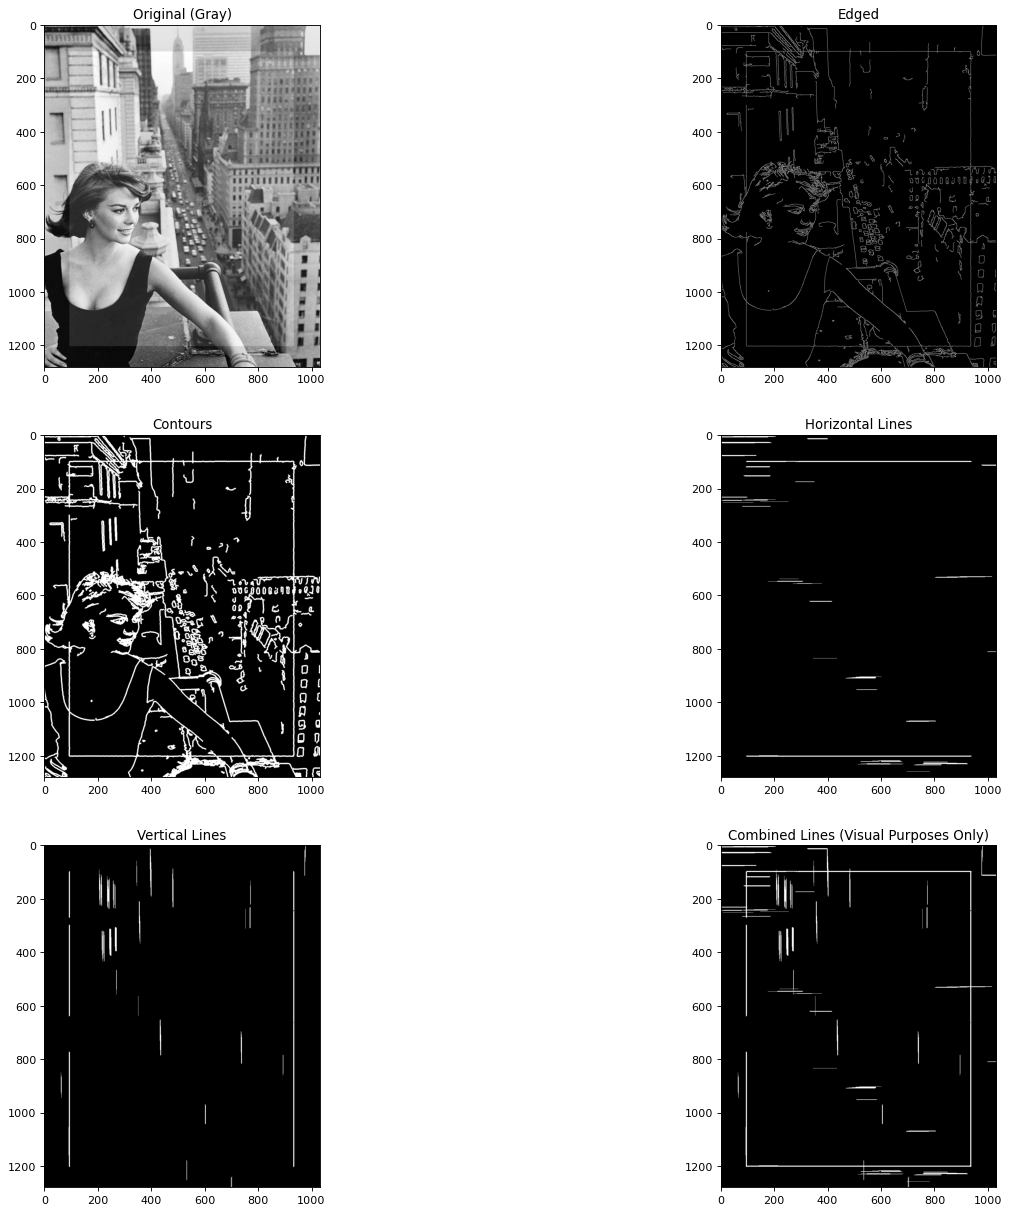

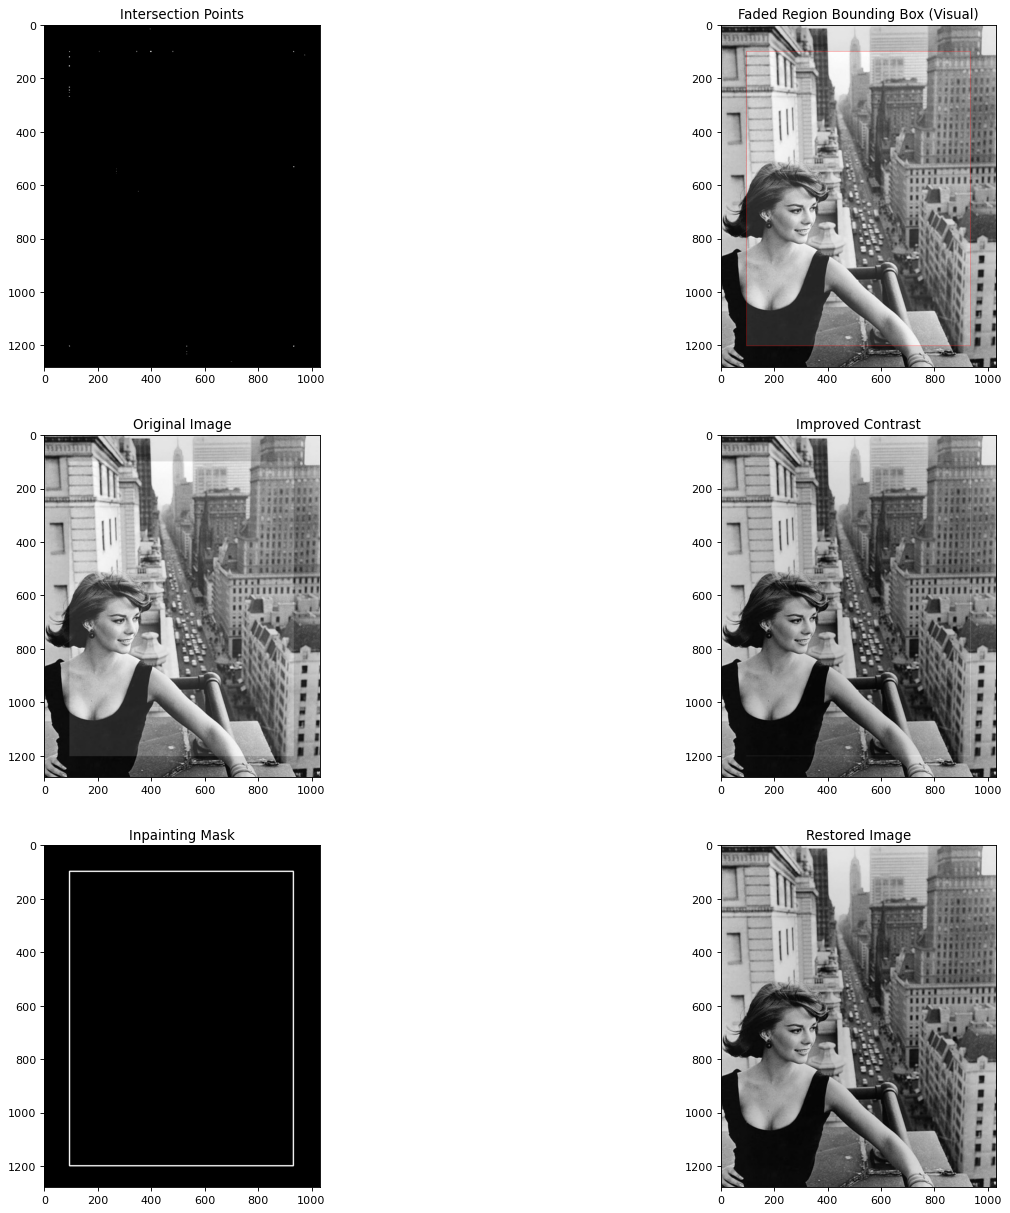

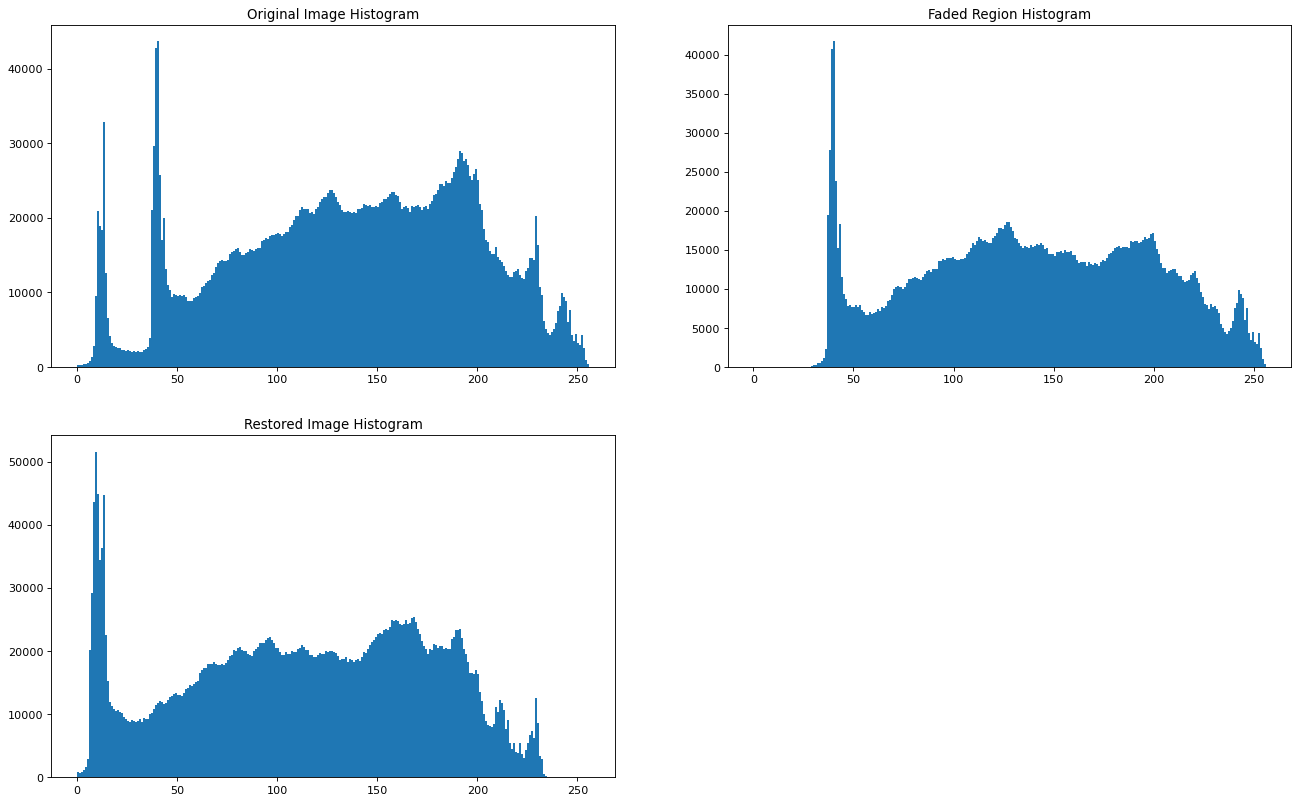

In [17]:
# Extract RGB values
red = imageRGB[:,:,0]
green = imageRGB[:,:,1]
blue = imageRGB[:,:,2]

# Get the mean of the RGB values
redMean = np.mean(red)
greenMean = np.mean(green)
blueMean = np.mean(blue)

# Put the values into an array
rgbMean = [redMean, greenMean, blueMean]

# RGB names for visual purposes
rgbNames = ["Red", "Green", "Blue"]

# Get the greatest and lowest of the values
greatestVal, lowestVal, greatestValIndex, lowestValIndex = getGreatestAndLowestPixValue(rgbMean)

print("Greatest Mean Value: ", rgbNames[greatestValIndex], "@", int(greatestVal))
print("Lowest Mean Value: ", rgbNames[lowestValIndex], "@", int(lowestVal))
print("Mean Difference:", int(greatestVal - lowestVal))
print("All Means (RGB order):", int(redMean), int(greenMean), int(blueMean))

# Determines which algorithm to use
# The program expects pictures which are grayscale or close enough to grayscale in that the colours are
# within a small range. If the so called mean colour range is bigger than 30 then there is colour damage.
# 30 is a value that works quite well from testing on other images
if greatestVal - lowestVal > 30:
    restoreColourDamagedImage(greatestVal, lowestVal, greatestValIndex, lowestValIndex)
else:
    restoreFadedImage()